# Импорт

In [18]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
from random import shuffle
sys.path.append("../Project")
from Classes.Ant import Ant
from Classes.TrackOfWalk import TrackOfWalk

# Общие переменные

In [19]:
field_size = 100

In [20]:
feromon_map = np.random.rand(field_size, field_size)
feromon_map = (feromon_map + feromon_map.T) / 2 
np.fill_diagonal(feromon_map, -np.inf)
distance_map = np.random.rand(field_size, field_size)
distance_map = (distance_map + distance_map.T) / 2 
np.fill_diagonal(distance_map, -np.inf)

In [21]:
print(feromon_map)

[[      -inf 0.04682256 0.7671851  ... 0.64072104 0.3698397  0.36284517]
 [0.04682256       -inf 0.39958781 ... 0.07061982 0.23963087 0.25669802]
 [0.7671851  0.39958781       -inf ... 0.80693047 0.59876636 0.56392107]
 ...
 [0.64072104 0.07061982 0.80693047 ...       -inf 0.32463546 0.69063636]
 [0.3698397  0.23963087 0.59876636 ... 0.32463546       -inf 0.42337156]
 [0.36284517 0.25669802 0.56392107 ... 0.69063636 0.42337156       -inf]]


In [22]:
print(distance_map)

[[      -inf 0.84619304 0.57226735 ... 0.21611607 0.39388148 0.75393677]
 [0.84619304       -inf 0.12845807 ... 0.30050625 0.41227706 0.68591895]
 [0.57226735 0.12845807       -inf ... 0.49141783 0.79987611 0.69908223]
 ...
 [0.21611607 0.30050625 0.49141783 ...       -inf 0.4637096  0.30749481]
 [0.39388148 0.41227706 0.79987611 ... 0.4637096        -inf 0.50164583]
 [0.75393677 0.68591895 0.69908223 ... 0.30749481 0.50164583       -inf]]


In [23]:
edges = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, distance_map[i][j]))


In [24]:
def experement(ant: Ant,
               pos: iter,
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray):
    track = ant.walk(pos=pos, 
                     distance_matrix=distance_map, 
                     feromon_matrix=feromon_map)
    feromon_map = feromon_map_updater.update(track=track, 
                                                feromon_matrix=feromon_map)
    return feromon_map

In [25]:
ants = [Ant(walk_distance=field_size+1, a=1, b=i) for i in range(1, 100)]
ants_blocks = [[Ant(walk_distance=j, a=1, b=1) for _ in range(1, 20)] for j in range(1, 40, 5)]
feromon_map_updater = TrackOfWalk(feromon_volume=field_size*100, feromon_erosion_speed=0.9999)
positions = [[i, i] for i in range(0, 100, 1)]
shuffle(positions)


In [26]:
def Dijkstra(N, S, matrix):
	valid = [True]*N        
	weight = [np.inf]*N
	weight[S] = 0
	way = []
	for i in range(N):
		min_weight = np.inf
		ID_min_weight = -1
		for j in range(N):
			if valid[j] and weight[j] < min_weight:
				min_weight = weight[j]
				ID_min_weight = j
		for z in range(N):
			if weight[ID_min_weight] + matrix[ID_min_weight][z] < weight[z]:
				weight[z] = weight[ID_min_weight] + matrix[ID_min_weight][z]
		valid[ID_min_weight] = False
		way.append(ID_min_weight)
	return weight, way

In [27]:
def experement_ants(ants, positions, num_of_iterations, feromon_map, distance_map):
    fm = np.array(feromon_map, copy=True)
    for _ in range(num_of_iterations):
        for ant, pos in zip(ants, positions):
            fm = experement(ant=ant, 
                            pos=pos, 
                            feromon_map_updater=feromon_map_updater, 
                            feromon_map=fm, 
                            distance_map=distance_map)
    way = Dijkstra(100, 1, fm*(-1))[1]
    print(way)
    return [distance_map[i[0], i[1]] for i in np.array(list(zip(way[:-2], way[1:])))], way, fm

In [28]:
res = []
for ants_block in ants_blocks:
    res.append(experement_ants(ants=ants_block, positions=positions, num_of_iterations=5, feromon_map=feromon_map, distance_map=distance_map))

[1, 57, 42, 41, 13, 84, 63, 54, 69, 7, 90, 32, 37, 23, 66, 2, 83, 12, 51, 6, 31, 16, 85, 65, 40, 35, 24, 59, 27, 79, 89, 53, 47, 94, 3, 99, 52, 95, 82, 67, 97, 4, 14, 77, 92, 96, 8, 9, 21, 64, 50, 78, 36, 46, 15, 72, 22, 29, 74, 71, 30, 76, 43, 61, 75, 58, 10, 80, 39, 73, 62, 98, 81, 70, 34, 45, 44, 25, 33, 86, 48, 18, 5, 17, 11, 20, 26, 0, 56, 88, 38, 60, 87, 19, 93, 28, 68, 49, 55, 91]
[1, 57, 42, 41, 13, 84, 63, 54, 69, 7, 90, 32, 37, 23, 66, 2, 83, 12, 51, 6, 31, 16, 85, 65, 40, 35, 24, 59, 27, 79, 89, 53, 47, 94, 3, 99, 52, 95, 82, 67, 5, 17, 8, 96, 22, 29, 74, 71, 30, 76, 43, 61, 75, 58, 72, 98, 62, 73, 81, 70, 34, 45, 44, 25, 33, 60, 87, 19, 88, 4, 14, 77, 92, 21, 50, 78, 36, 46, 15, 48, 18, 49, 11, 20, 26, 0, 56, 9, 68, 86, 10, 80, 39, 64, 97, 55, 38, 93, 28, 91]
[1, 57, 42, 41, 13, 84, 63, 54, 69, 7, 90, 32, 37, 23, 66, 2, 83, 12, 51, 6, 31, 16, 85, 65, 40, 35, 24, 59, 27, 79, 89, 53, 47, 94, 3, 99, 52, 95, 82, 67, 5, 17, 8, 96, 22, 29, 74, 71, 30, 76, 43, 61, 75, 58, 72, 98, 

In [29]:
h_mark = []
h_mean = []
h_max = []
w_mark = []
w_mean = []
w_max = []
for i in distance_map:
    w_mark.append(i[i != -np.inf].min())
    w_mean.append(i[i != -np.inf].mean())
    h_max.append(i[i != -np.inf].max())
for i in distance_map:
    h_mark.append(i[i != -np.inf].min())
    h_mean.append(i[i != -np.inf].mean())
    w_max.append(i[i != -np.inf].max())

sum(h_mark), sum(w_mark), sum(h_mean), sum(w_mean), sum(h_max), sum(w_max)

(6.532271137375007,
 6.532271137375007,
 50.00534727601617,
 50.00534727601617,
 93.5692630496132,
 93.5692630496132)

<Axes: xlabel='walk_distance', ylabel='res'>

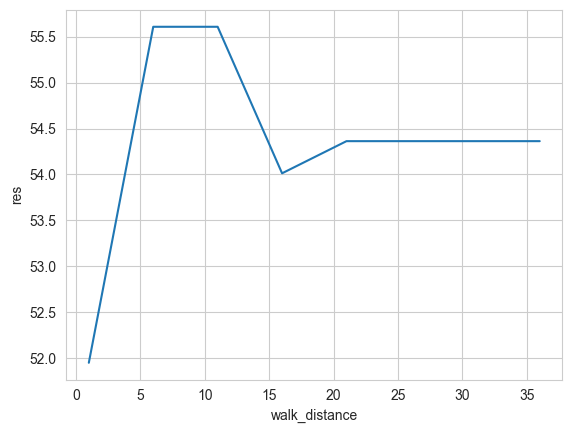

In [35]:
sns.set_style("whitegrid")
sns.lineplot(data={'walk_distance': list(range(1, 40, 5)), 'res': [sum(i[0]) for i in res]}, x="walk_distance", y="res")
# sns.lineplot(data={'count': list(range(25, 100, 5)), 'res': [sum(h_mean) for i in res]}, x="count", y="res")

In [31]:
way = Dijkstra(100, 1, feromon_map*(-1))[1]
ways = np.array(list(zip(way[:-2], way[1:])))

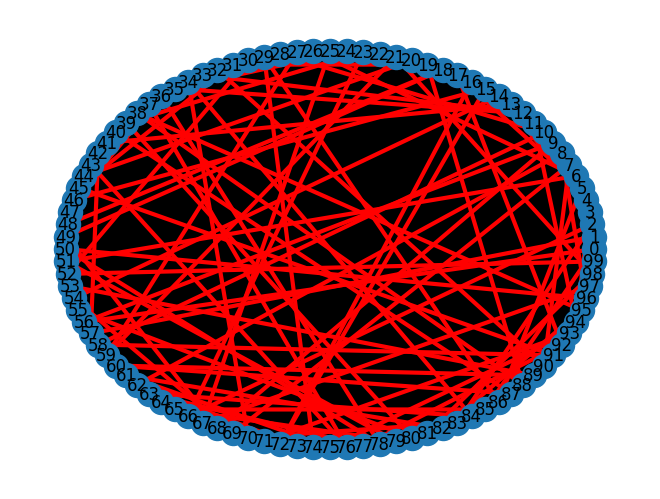

In [32]:
K1 = nx.Graph()

for start, end, length in edges:
    K1.add_edge(start, end, length=length)

nx.draw_circular(K1, with_labels = True)
nx.draw_networkx_edges(K1, nx.circular_layout(K1), edgelist=ways, edge_color='r', arrows=True, width=3)

In [33]:
distance = []
for i in ways:
    distance.append(distance_map[i[0], i[1]])
sum(distance)

46.774813624349214

In [34]:
h_mark = []
h_mean = []
h_max = []
w_mark = []
w_mean = []
w_max = []
for i in distance_map:
    w_mark.append(i[i != -np.inf].min())
    w_mean.append(i[i != -np.inf].mean())
    h_max.append(i[i != -np.inf].max())
for i in distance_map:
    h_mark.append(i[i != -np.inf].min())
    h_mean.append(i[i != -np.inf].mean())
    w_max.append(i[i != -np.inf].max())

sum(h_mark), sum(w_mark), sum(h_mean), sum(w_mean), sum(h_max), sum(w_max)

(6.532271137375007,
 6.532271137375007,
 50.00534727601617,
 50.00534727601617,
 93.5692630496132,
 93.5692630496132)